In [33]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import r2_score , confusion_matrix , root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [34]:
dataset = pd.read_csv(r"bikes.csv")
dataset

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000


In [35]:
dataset.isnull().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64

In [36]:
dataset.dropna(axis=0,inplace=True)

In [37]:
dataset['model_name'].unique()

array(['Bajaj Avenger Cruise 220 2017',
       'Royal Enfield Classic 350cc 2016', 'Hyosung GT250R 2012', ...,
       'Bajaj Discover 125cc 2009', 'Bajaj Pulsar 200cc 2011',
       'Hero CD Deluxe 100cc 2004'], dtype=object)

In [38]:
dataset.columns

Index(['model_name', 'model_year', 'kms_driven', 'owner', 'location',
       'mileage', 'power', 'price'],
      dtype='object')

In [39]:
dataset['brand'] = dataset['model_name'].str.split().str[0]
dataset['engine_cc'] = dataset['model_name'].str.extract(r'(\d+)\s*cc', expand=False).astype(float)
dataset['model_variant'] = dataset['model_name'].str.replace(r'\d+cc|\d{4}', '', regex=True).str.strip()


In [40]:
# Frequency Encoding
freq_map = dataset['model_variant'].value_counts().to_dict()
dataset['model_variant_encoded'] = dataset['model_variant'].map(freq_map)


In [41]:
dataset.drop(['model_name','model_variant'],axis=1 , inplace=True)

In [42]:
dataset

,model_year,kms_driven,owner,location,mileage,power,price,brand,engine_cc,model_variant_encoded
0,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,Bajaj,NaN,55
1,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,Royal,350.0,477
2,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,Hyosung,NaN,24
3,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,Bajaj,NaN,77
4,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,Jawa,330.0,10
...,...,...,...,...,...,...,...,...,...,...
7852,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000,Yamaha,150.0,75
7853,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000,Bajaj,100.0,135
7854,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740,Bajaj,180.0,486
7855,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000,Bajaj,150.0,118


In [43]:
le_brand = LabelEncoder()
le_owner = LabelEncoder()

# Apply label encoding
dataset['brand'] = le_brand.fit_transform(dataset['brand'])
dataset['owner'] = le_owner.fit_transform(dataset['owner'])

In [44]:
dataset['kms_driven'].unique()

array(['17000 Km', '50000 Km', '14795 Km', ..., '66780 Km', '16510 Km',
       '6407 Km'], dtype=object)

In [45]:
import pandas as pd

# Example: your DataFrame
# df = pd.read_csv("bikes.csv")

# Step 1: Clean the 'kms_driven' column
def clean_kms(value):
    if pd.isnull(value):
        return None
    value = str(value)
    # Extract numeric part using regex
    import re
    match = re.search(r'\d+', value.replace(',', ''))  # remove commas
    if match:
        return int(match.group())  # convert to integer
    else:
        return None  # return None if no number found

# Apply cleaning function
dataset['kms_driven'] = dataset['kms_driven'].apply(clean_kms)

# Step 2: Check for any null or invalid rows
print(dataset['kms_driven'].isna().sum(), "missing values in kms_driven")

# Step 3 (Optional): Fill missing with median or mean
dataset['kms_driven'].fillna(dataset['kms_driven'].median(), inplace=True)

# Check final result
print(dataset['kms_driven'].head())
print(dataset['kms_driven'].dtype)


3 missing values in kms_driven
0    17000.0
1    50000.0
2    14795.0
3       28.0
4     2000.0
Name: kms_driven, dtype: float64
float64


C:\Users\Satyajeet\AppData\Local\Temp\ipykernel_1444\235566703.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['kms_driven'].fillna(dataset['kms_driven'].median(), inplace=True)


In [46]:
location_map = dataset['location'].value_counts().to_dict()
dataset['location'] = dataset['location'].map(location_map)


In [47]:
dataset

,model_year,kms_driven,owner,location,mileage,power,price,brand,engine_cc,model_variant_encoded
0,2017,17000.0,0,335,\n\n 35 kmpl,19 bhp,63500,2,NaN,55
1,2016,50000.0,0,335,\n\n 35 kmpl,19.80 bhp,115000,19,350.0,477
2,2012,14795.0,0,335,\n\n 30 kmpl,28 bhp,300000,11,NaN,24
3,2017,28.0,0,6,\n\n 28 Kms,34.50 bhp,100000,2,NaN,77
4,2020,2000.0,0,776,\n\n,30 bhp,197500,13,330.0,10
...,...,...,...,...,...,...,...,...,...,...
7852,2011,7000.0,0,24,\n\n 42 kmpl,16 bhp,55000,24,150.0,75
7853,2015,80.0,0,1432,\n\n 80 Kmpl,7.7,28000,2,100.0,135
7854,2016,6407.0,0,776,\n\n 65 kmpl,17 bhp,61740,2,180.0,486
7855,2016,7524.0,0,776,\n\n 57 kmpl,11.80 bhp,49000,2,150.0,118


In [48]:
dataset[['engine_cc', 'price']].corr()


,engine_cc,price
engine_cc,1.000000,0.726595
price,0.726595,1.000000


In [49]:
# Fill engine_cc missing values by median CC of each brand
dataset['engine_cc'] = dataset.groupby('brand')['engine_cc'].transform(
    lambda x: x.fillna(x.median())
)

# If any still missing (in case some brands have all nulls)
dataset['engine_cc'].fillna(dataset['engine_cc'].median(), inplace=True)


C:\Users\Satyajeet\AppData\Local\Temp\ipykernel_1444\2862169016.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['engine_cc'].fillna(dataset['engine_cc'].median(), inplace=True)


In [57]:
dataset

,model_year,kms_driven,owner,location,mileage,power,price,brand,engine_cc,model_variant_encoded
0,2017,17000.0,0,335,35.0,19.0,63500,2,150.0,55
1,2016,50000.0,0,335,35.0,19.8,115000,19,350.0,477
2,2012,14795.0,0,335,30.0,28.0,300000,11,150.0,24
3,2017,28.0,0,6,28.0,34.5,100000,2,150.0,77
4,2020,2000.0,0,776,40.0,30.0,197500,13,330.0,10
...,...,...,...,...,...,...,...,...,...,...
7852,2011,7000.0,0,24,42.0,16.0,55000,24,150.0,75
7853,2015,80.0,0,1432,80.0,7.7,28000,2,100.0,135
7854,2016,6407.0,0,776,65.0,17.0,61740,2,180.0,486
7855,2016,7524.0,0,776,57.0,11.8,49000,2,150.0,118


In [51]:
import pandas as pd
import numpy as np
import re

# Example: your dataframe name is df and column is 'mileage'
# First, remove \n, spaces, etc.
dataset['mileage'] = dataset['mileage'].str.strip().str.replace('\n', '').str.replace(' ', '')

# Function to extract numeric values
def extract_mileage(value):
    if pd.isna(value) or value == '':
        return np.nan
    # find all numbers (handles ranges like 45-55)
    nums = re.findall(r'\d+\.?\d*', value)
    if len(nums) == 0:
        return np.nan
    elif len(nums) == 1:
        return float(nums[0])
    else:
        # if it's a range like 45-55 take the average
        nums = [float(n) for n in nums]
        return sum(nums) / len(nums)

# Apply function
dataset['mileage'] = dataset['mileage'].apply(extract_mileage)

# Convert to float type
dataset['mileage'] = dataset['mileage'].astype(float)

# Check result
print(dataset['mileage'].head(10))
print(dataset['mileage'].isna().sum(), "null values after cleaning")


0    35.0
1    35.0
2    30.0
3    28.0
4     NaN
5    35.0
6    65.0
7    40.0
8    25.0
9    58.0
Name: mileage, dtype: float64
734 null values after cleaning


In [52]:
dataset['mileage'] = dataset.groupby('brand')['mileage'].transform(
    lambda x: x.fillna(x.median())
)


In [53]:
import re
import numpy as np
import pandas as pd

# Clean spaces and case
dataset['power'] = dataset['power'].astype(str).str.strip()

def extract_power(value):
    if pd.isna(value) or value.strip() == '' or value.lower() in ['nan', 'none']:
        return np.nan

    value = value.replace(',', '').lower()

    # Extract number
    nums = re.findall(r'\d+\.?\d*', value)
    if not nums:
        return np.nan

    num = float(nums[0])

    # Convert based on unit
    if 'kw' in value:
        # 1 kW = 1.34102 bhp
        num = num * 1.34102
    elif 'ps' in value:
        # 1 PS = 0.9863 bhp
        num = num * 0.9863
    # if bhp or hp is already there, keep as is

    return round(num, 2)

# Apply cleaning function
dataset['power'] = dataset['power'].apply(extract_power)

# Convert to float
dataset['power'] = dataset['power'].astype(float)

# Check cleaned results
print(dataset['power'].head(10))
print(dataset['power'].isna().sum(), "null values after cleaning")


0    19.00
1    19.80
2    28.00
3    34.50
4    30.00
5    25.00
6    17.00
7    20.21
8    42.90
9    13.00
Name: power, dtype: float64
0 null values after cleaning


In [56]:
dataset.isnull().sum()

model_year               0
kms_driven               0
owner                    0
location                 0
mileage                  0
power                    0
price                    0
brand                    0
engine_cc                0
model_variant_encoded    0
dtype: int64

In [55]:
dataset['mileage'].fillna(dataset['mileage'].median(), inplace=True)


C:\Users\Satyajeet\AppData\Local\Temp\ipykernel_1444\4223744954.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['mileage'].fillna(dataset['mileage'].median(), inplace=True)


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Split
X = dataset.drop('price', axis=1)
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rf = RandomForestRegressor(
    n_estimators=300,   # number of trees
    max_depth=15,       # prevent overfitting
    random_state=42
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.87325983648672
MAE: 15856.989091459962
RMSE: 42200.286680455225


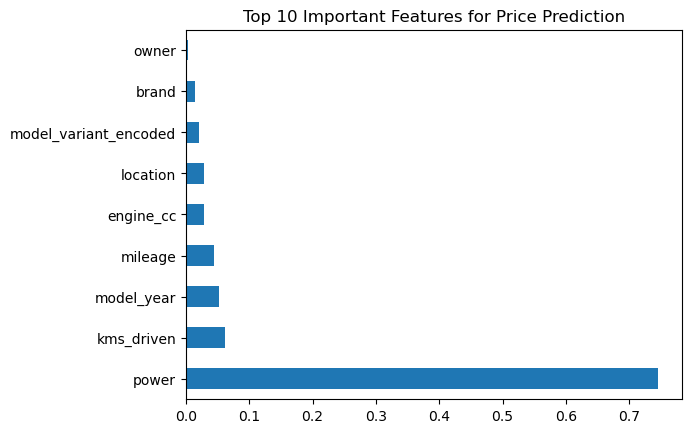

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features for Price Prediction")
plt.show()


In [60]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

from sklearn.metrics import r2_score
print("R2:", r2_score(y_test, y_pred))


R2: 0.875454306602478


In [61]:
dataset.columns

Index(['model_year', 'kms_driven', 'owner', 'location', 'mileage', 'power',
       'price', 'brand', 'engine_cc', 'model_variant_encoded'],
      dtype='object')

In [62]:
import joblib

# Save model
joblib.dump(rf, 'price_prediction_model.pkl')
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [63]:
joblib.dump(le_brand, 'brand_label_encoder.pkl')

['brand_label_encoder.pkl']

In [64]:
joblib.dump(le_owner, 'owner_label_encoder.pkl')

['owner_label_encoder.pkl']

In [65]:
joblib.dump(location_map, 'location_freq_map.pkl')


['location_freq_map.pkl']

In [66]:
joblib.dump(freq_map, 'model_variant_freq_map.pkl')


['model_variant_freq_map.pkl']